# Маємо формулу
Ти замовив/-ла виконання дослідження ефективності роботи співробітників і отримав/-ла наближену залежність ефективності роботи (кількість тасків за одиницю часу) від часу доби, за умови, що завдання однакові за складністю.

$$
2 \left(
\frac{4}{1.2 \sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x - 11}{1.2} \right)^2 } +
\frac{7}{2.4 \sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x - 15}{2.4} \right)^2 }
\right)
$$

Позначимо початок і кінець робочого дня як a=9 та b=18 відповідно.
Тобі буде потрібно порахувати середню кількість тасків, виконаних упродовж робочого дня (в робочі години з 9 до 18).

# Завдання №1
Візуалізуй функцію на відрізку від 0 до 24. За допомогою *SymPy* порахуй невизначений інтеграл функції та інтеграл від *a* до *b*.

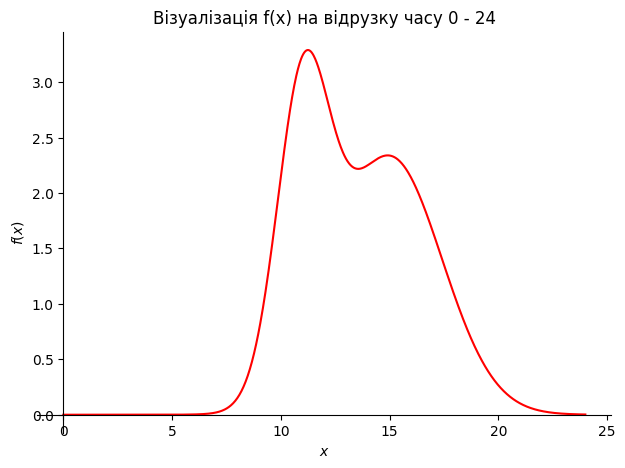

In [109]:
from sympy import sqrt, pi, exp, Symbol
from sympy.plotting import plot

x = Symbol('x')
f = 2 * (
    (4 / (1.2 * sqrt(2 * pi))) * exp(-1/2 * ((x - 11)/1.2)**2) +
    (7 / (2.4 * sqrt(2 * pi))) * exp(-1/2 * ((x - 15)/2.4)**2)
)

p = plot(f, (x, 0, 24), show=False, line_color='red')
p.title = 'Візуалізація f(x) на відрузку часу 0 - 24'
p.show()

In [110]:
from sympy import integrate

print("Невизначений інтеграл: " + str(integrate(f, x)))
print("Визначений інтеграл на відрізку від 9 до 18 " + str(integrate(f, (x, 9, 18)).evalf()))

Невизначений інтеграл: 4.94974746830583*sqrt(2)*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*sqrt(2)*erf(0.58925565098879*x - 6.48181216087669)
Визначений інтеграл на відрізку від 9 до 18 20.0516450141883


# Завдання 2

Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від *a* до *b*.

In [111]:
def rectangle_method(f, x, a, b, n):
    """Рахуємо по середніх прямокутниках"""
    h = (b - a) / n
    f_ = lambdify(x, f, 'numpy')
    middle_points = [a + (i + 0.5) * h for i in range(n)]

    return h * sum(f_(x_) for x_ in middle_points)

print("Інтеграл методом трикутників " + str(rectangle_method(f, x, 9, 18, 17)))

Інтеграл методом трикутників 20.07014536393186


# Завдання 3
Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від *a* до *b*.

In [112]:
def trapezoid_method(f, x, a, b, n):
    h = (b - a) / n
    f_ = lambdify(x, f, 'numpy')

    points = [a + (i * h) for i in range(n + 1)]

    return (h/2) * (f_(points[0]) + sum(2*f_(x_) for x_ in points[1:-1]) + f_(points[-1]))

print("Інтеграл методом трапецій " + str(trapezoid_method(f, x, 9, 18, 17)))

Інтеграл методом трапецій 20.014660753314047


# Завдання 4
Напиши функцію чисельного інтегрування методом Сімпсона та порахуй інтеграл від *a* до *b*.

In [113]:
def simpson_method(f, x, a, b, n):
    h = (b - a) / n
    f_ = lambdify(x, f, 'numpy')
    points = [a + (i * h) for i in range(n + 1)]

    return (h/3) * (f_(points[0]) + sum(2*f_(x_) if i % 2 == 0 else 4*f_(x_) for x_, i in zip(points, range(1, n))) + f_(points[-1]))

print("Інтеграл методом Сімпсона " + str(simpson_method(f, x, 9, 18, 17)))

Інтеграл методом Сімпсона 19.441866500337728


# Завдання 5
Порахуй інтеграл від *a* до *b* за допомогою функції *scipy.integrate.quad*.

In [114]:
from sympy import lambdify
from scipy.integrate import quad
# Перетворюємо символьний вираз в функцію Python
f_numpy = lambdify(x, f, 'numpy')

# Обчислюємо інтеграл
result, error = quad(f_numpy, 9, 18)

print(f"Інтеграл за допомогою scipy.integrate.quad: {result}")
print(f"Оцінка похибки: {error}")


Інтеграл за допомогою scipy.integrate.quad: 20.05164501418832
Оцінка похибки: 1.2672390114804206e-11
